数据探索与可视化

实验目标
学习并掌握如何使用Python进行数据探索与可视化。
理解并应用数据探索的基本方法，包括数据清洗、格式化和描述性统计分析。
使用Matplotlib和Seaborn等可视化工具，绘制不同类型的图表，分析数据分布及特征之间的关系。
利用pandas_profiling生成数据的交互式报告，全面了解数据的分布、缺失值和异常值。

实验要求
1.使用pandas读取数据集github_bot_processed_data.csv。探索pandas的显示选项，以便查看更多数据行和列。

In [3]:
import chardet
# 查看编码格式
with open('D:\\Data_code\\Courses\\ItDSaE\\hw8_github_bot_processed_data.csv', 'rb') as file:
    enco = chardet.detect(file.read())
    print(enco['encoding'])

MacRoman


In [4]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv('D:\\Data_code\\Courses\\ItDSaE\\hw8_github_bot_processed_data.csv',encoding=enco['encoding'])

# 删除最后六列
df = df.drop(df.columns[-6:], axis=1)

# 显示指定数据
pd.set_option('display.max_rows',10) # 在输出中显示10行
pd.set_option('display.max_columns', 4) # 在输出中显示4列
print(df.head(20)) #输出前20行
print(df.tail(20)) #输出后20行

# 查看基本信息
print(df.info())

    label  type  ...                 updated_at text_bot_count
0   Human  TRUE  ...  2023-10-13 11:21:10+00:00              0
1   Human  TRUE  ...  2023-10-07 06:26:14+00:00              0
2   Human  TRUE  ...  2023-10-02 02:11:21+00:00              0
3     Bot  TRUE  ...  2023-10-12 12:54:59+00:00              0
4   Human  TRUE  ...  2023-10-06 11:58:41+00:00              0
..    ...   ...  ...                        ...            ...
15  Human  TRUE  ...  2023-10-12 02:40:32+00:00              0
16  Human  TRUE  ...  2023-10-14 09:46:54+00:00              0
17  Human  TRUE  ...  2023-09-23 11:22:35+00:00              0
18  Human  TRUE  ...  2023-10-11 18:11:52+00:00              0
19    Bot  TRUE  ...  2021-08-10 23:43:38+00:00              0

[20 rows x 15 columns]
       label  type  ...                 updated_at text_bot_count
19493  Human  TRUE  ...  2023-10-13 15:18:02+00:00              0
19494  Human  TRUE  ...  2023-10-10 14:27:48+00:00              2
19495  Human  TRUE  ..

2.使用head()方法查看数据的前几行，并使用info()方法查看每列的数据类型，观察两者的区别。 使用describe()方法生成数据的描述性统计信息。

In [6]:
# 恢复默认显示选项
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

# 使用 head() 方法查看数据的前几行
print("前几行数据：")
print(df.head(10))  # 显示前10行

# 使用 info() 方法查看每列的数据类型
print("\n数据类型信息：")
print(df.info())  # 显示数据框的基本信息，包括数据类型

# 使用 describe() 方法生成数据的描述性统计信息
print("\n描述性统计信息：")
print(df.describe())  # 显示数值型列的描述性统计

前几行数据：
   label  type site_admin company   blog location hireable  \
0  Human  TRUE      FALSE   FALSE  FALSE    FALSE    FALSE   
1  Human  TRUE      FALSE   FALSE   TRUE    FALSE     TRUE   
2  Human  TRUE      FALSE    TRUE   TRUE     TRUE     TRUE   
3    Bot  TRUE      FALSE   FALSE  FALSE     TRUE    FALSE   
4  Human  TRUE      FALSE   FALSE  FALSE    FALSE     TRUE   
5  Human  TRUE      FALSE    TRUE   TRUE     TRUE    FALSE   
6  Human  TRUE      FALSE    TRUE   TRUE     TRUE     TRUE   
7  Human  TRUE      FALSE    TRUE  FALSE     TRUE    FALSE   
8  Human  TRUE      FALSE   FALSE  FALSE    FALSE    FALSE   
9  Human  TRUE      FALSE    TRUE   TRUE     TRUE    FALSE   

                                                 bio public_repos  \
0                                                NaN           26   
1  I just press the buttons randomly, and the pro...           30   
2         Time is unimportant,\nonly life important.          103   
3                                 

3.对数据进行格式化处理，并展示不同格式（例如，日期、货币、百分比等）的效果。

In [7]:
df_copy=df.copy()
# 1. 格式化日期列
# 假设 'created_at' 和 'updated_at' 是日期格式，需要先将其转换为日期类型
df_copy['created_at'] = pd.to_datetime(df_copy['created_at'], errors='coerce')
df_copy['updated_at'] = pd.to_datetime(df_copy['updated_at'], errors='coerce')

# 展示日期列格式化后的效果
print("格式化后的日期列：")
print(df_copy[['created_at', 'updated_at']].head())

# 2. 格式化货币列
# 将'public_repos'化为货币格式
# 先转换为数字格式，然后使用格式化显示
df_copy['public_repos'] = pd.to_numeric(df_copy['public_repos'], errors='coerce')

# 格式化为货币格式，保留两位小数
df_copy['public_repos'] = df_copy['public_repos'].apply(lambda x: f"${x:,.2f}" if pd.notna(x) else '$0.00')

# 展示格式化后的货币列
print("\n格式化后的货币列（public_repos）：")
print(df_copy[['public_repos']].head())

# 3. 格式化百分比列
# 将'public_gists'化为百分比格式
# 先化为数字格式
df_copy['public_gists'] = pd.to_numeric(df_copy['public_gists'], errors='coerce')

# 乘以100并加上百分号
df_copy['public_gists'] = df_copy['public_gists'].apply(lambda x: f"{x * 100:.2f}%" if pd.notna(x) else '0.00%')

# 展示格式化后的百分比列
print("\n格式化后的百分比列（public_gists）：")
print(df_copy[['public_gists']].head())

# 4. 格式化数字列（例如：followers）
# 假设 'followers' 列是数字，我们可以为其添加千位分隔符
df_copy['followers'] = pd.to_numeric(df_copy['followers'], errors='coerce')
df_copy['followers'] = df_copy['followers'].apply(lambda x: f"{x:,.0f}" if pd.notna(x) else '0')

# 展示格式化后的数字列（followers）
print("\n格式化后的数字列（followers）：")
print(df_copy[['followers']].head())


格式化后的日期列：
                 created_at                updated_at
0 2011-09-26 17:27:03+00:00 2023-10-13 11:21:10+00:00
1 2015-06-29 10:12:46+00:00 2023-10-07 06:26:14+00:00
2 2008-08-29 16:20:03+00:00 2023-10-02 02:11:21+00:00
3 2014-05-20 18:43:09+00:00 2023-10-12 12:54:59+00:00
4 2012-08-16 14:19:13+00:00 2023-10-06 11:58:41+00:00

格式化后的货币列（public_repos）：
  public_repos
0       $26.00
1       $30.00
2      $103.00
3       $49.00
4       $11.00

格式化后的百分比列（public_gists）：
  public_gists
0      100.00%
1      300.00%
2     4900.00%
3        0.00%
4      100.00%

格式化后的数字列（followers）：
  followers
0         5
1         9
2     1,212
3        84
4         6


4.对public_repos、public_gists、followers、following等列进行对数变换，并查看其影响。

In [8]:
import numpy as np
# 假设 df 是你的 DataFrame
# 1.先检查原始数据分布
print("initial data distribution:")
print(df[['public_repos', 'public_gists', 'followers', 'following']].describe())

# 2.确保所有相关列的数据都是数值型
df['public_repos'] = pd.to_numeric(df['public_repos'], errors='coerce')
df['public_gists'] = pd.to_numeric(df['public_gists'], errors='coerce')
df['followers'] = pd.to_numeric(df['followers'], errors='coerce')
df['following'] = pd.to_numeric(df['following'], errors='coerce')

# 3.对 public_repos, public_gists, followers, following 进行对数变换
# 为了防止对数变换时出现负值或零值，可以加上一个小常数（如1）
df['log_public_repos'] = np.log1p(df['public_repos'])  # np.log1p(x) 是 log(x+1)
df['log_public_gists'] = np.log1p(df['public_gists'])
df['log_followers'] = np.log1p(df['followers'])
df['log_following'] = np.log1p(df['following'])

# 4.检查变换后的数据
print("\ndata after log transformation:")
print(df[['log_public_repos', 'log_public_gists', 'log_followers', 'log_following']].describe())


initial data distribution:
       public_repos public_gists followers following
count         19452        19445     19441     19437
unique          701          410      1576       735
top               0            0         0         0
freq            971         7794      1436      5901

data after log transformation:
       log_public_repos  log_public_gists  log_followers  log_following
count      19418.000000      19425.000000   19429.000000   19309.000000
mean           3.375564          1.386963       3.490025       1.848302
std            1.489459          1.518850       1.954480       1.737556
min            0.000000          0.000000       0.000000       0.000000
25%            2.484907          0.000000       2.079442       0.000000
50%            3.555348          1.098612       3.526361       1.609438
75%            4.418841          2.397895       4.828314       3.135494
max           10.819798         10.929207      11.469527       9.725676


5.使用Matplotlib绘制图表
绘制条形图：展示label列的类别分布。

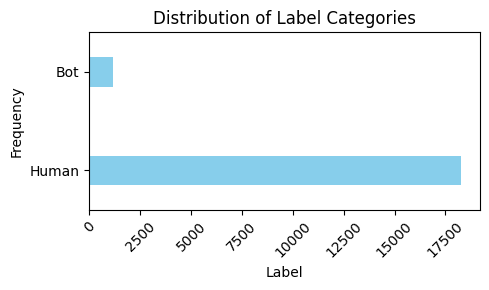

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
type_counts=df['label'].value_counts()
# 仅保留'Human'和'Bot'类型的比例
type_counts = type_counts[type_counts.index.isin(['Human', 'Bot'])]
type_counts.plot(kind='barh', color='skyblue',width=0.3)
plt.title('Distribution of Label Categories')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

绘制堆积柱状图：展示多个布尔特征（如site_admin、company等）的分布。

                0      1
type          224  19289
site_admin  19423     90
company      8878  10635
blog        11138   8375
location     7011  12502
hireable    16282   3231


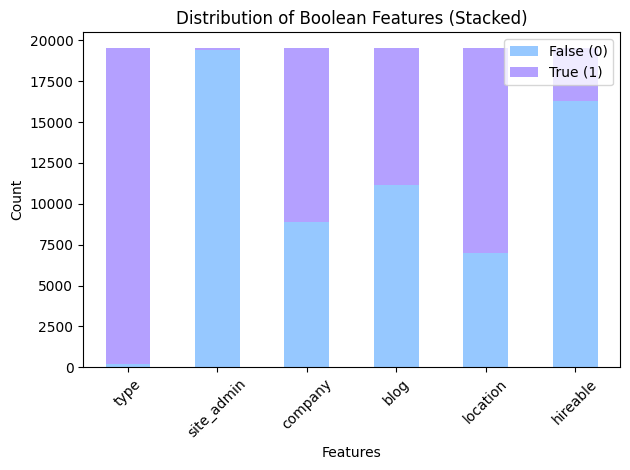

In [10]:
# 将布尔特征转换为数值（0 和 1）
boolean_columns = ['type', 'site_admin', 'company', 'blog', 'location', 'hireable']

# 将值不是 True 或 False 的替换为 0
# 将非布尔值（不是 'TRUE'）转换为 0，将 'TRUE' 转换为 1
df[boolean_columns] = df[boolean_columns].map(lambda x: x == 'TRUE').astype(int)

# 统计每个布尔列中 0 和 1 的数量
stacked_data = df[boolean_columns].apply(lambda x: x.value_counts()).T  # 转置以便绘图
print(stacked_data)

# 绘制堆积柱状图
stacked_data.plot(kind='bar', stacked=True, color=["#96C8FF", "#B4A0FF"])
plt.title('Distribution of Boolean Features (Stacked)')
plt.xlabel('Features')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(['False (0)', 'True (1)'])  # 添加图例，表示 0 和 1 的含义
plt.tight_layout()
plt.show()

绘制直方图：展示log_public_repos的对数变换后的数据分布。

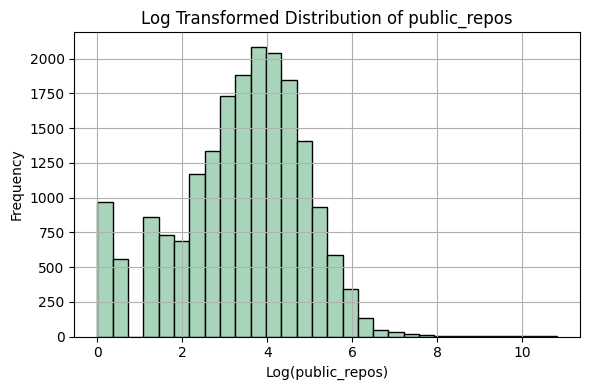

In [11]:
plt.figure(figsize=(6, 4))
df['log_public_repos'].dropna().hist(bins=30, color="#A8D5BA", edgecolor='black')
plt.title('Log Transformed Distribution of public_repos')
plt.xlabel('Log(public_repos)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

绘制散点图：展示public_repos与followers之间的关系。

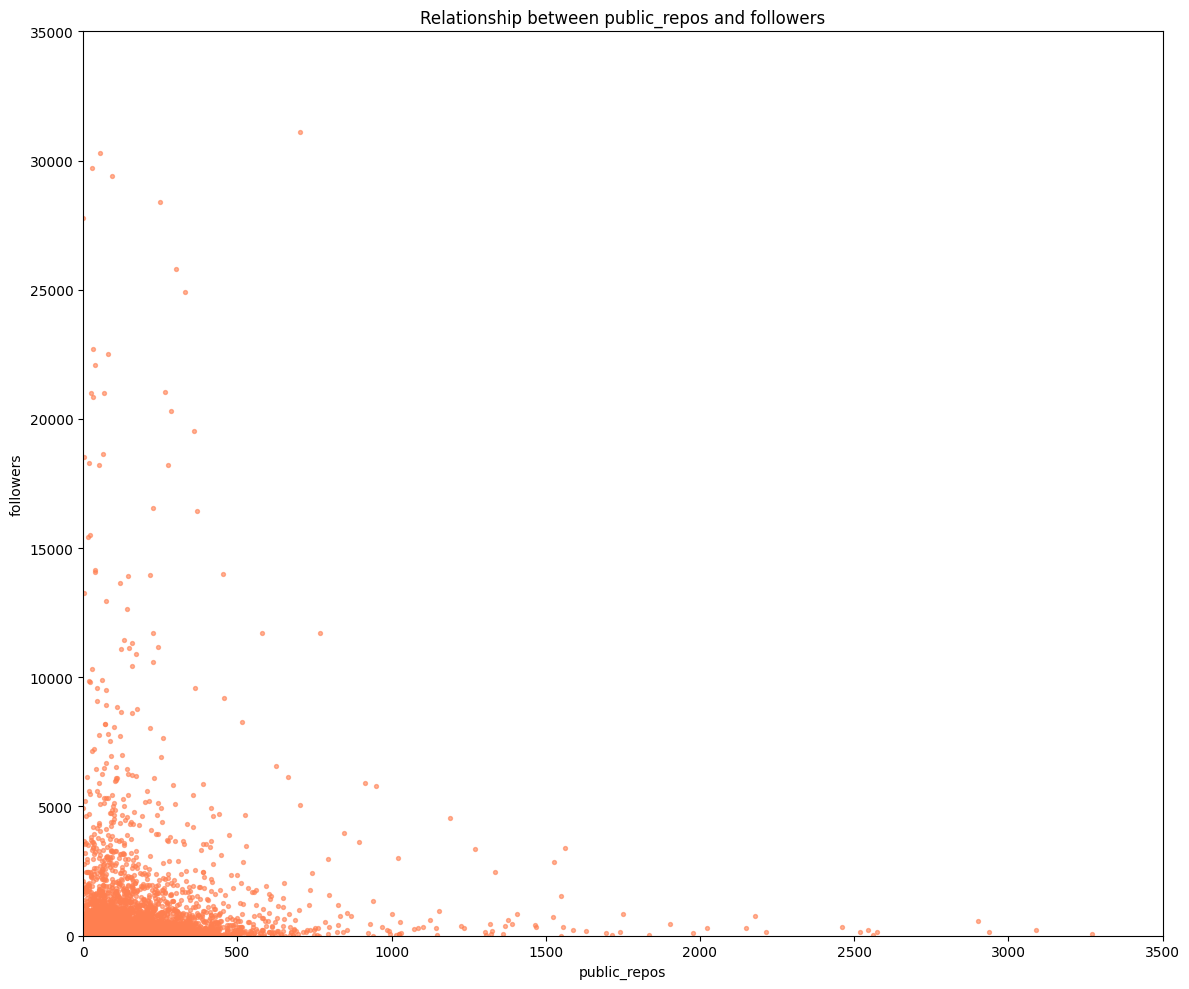

In [12]:
plt.figure(figsize=(12, 10))
plt.scatter(df['public_repos'], df['followers'], alpha=0.6, color='coral',s=8)
# 限制横轴和纵轴范围
plt.xlim(0, 3500)
plt.ylim(0, 35000)

plt.title('Relationship between public_repos and followers')
plt.xlabel('public_repos')
plt.ylabel('followers')
plt.tight_layout()
plt.show()


绘制散点矩阵：展示多个数值型特征之间的成对关系。

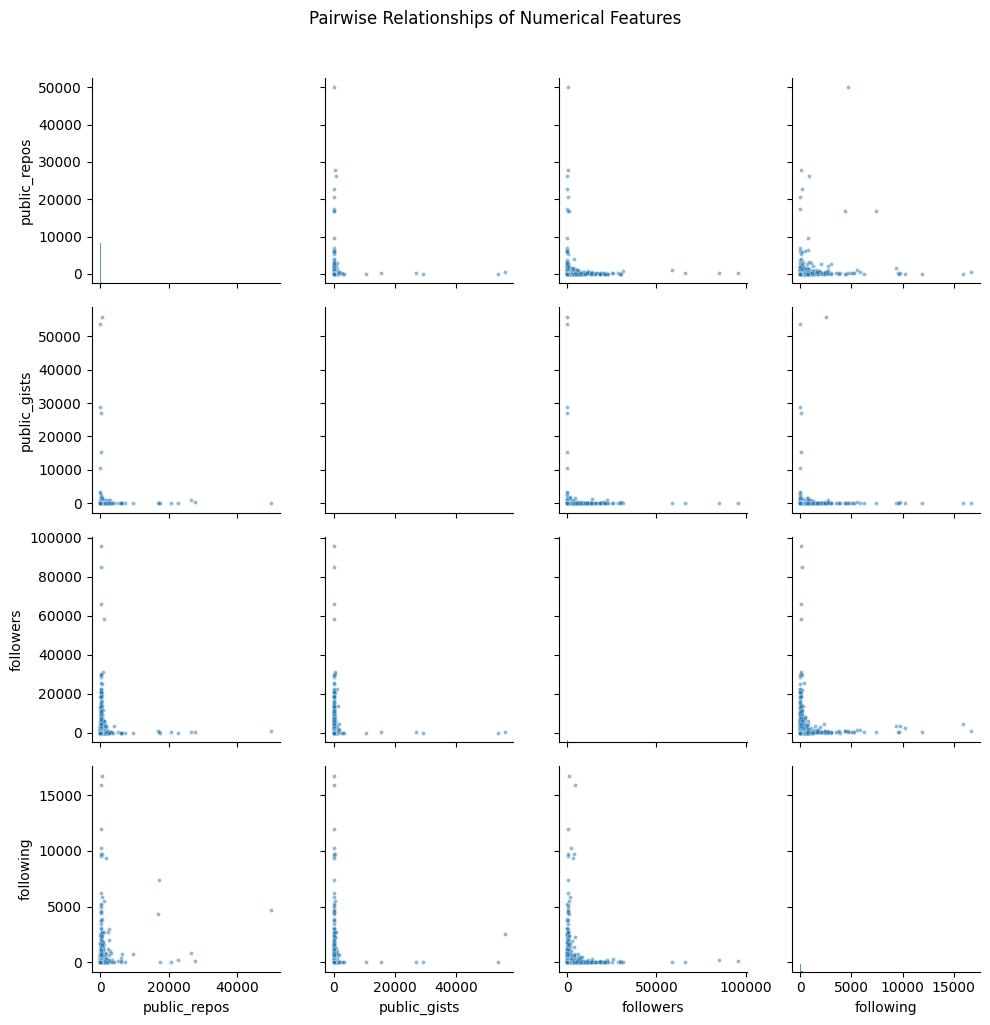

In [13]:
import seaborn as sns

# 绘制散点矩阵：展示多个数值型特征之间的成对关系
numerical_columns = ['public_repos', 'public_gists', 'followers', 'following']
sns.pairplot(df[numerical_columns].dropna(), plot_kws={'alpha':0.5,'s':8})
plt.suptitle('Pairwise Relationships of Numerical Features', y=1.02)
plt.tight_layout()
plt.show()

6.使用Seaborn绘制图表
绘制箱线图：展示不同label类别下log_followers的分布。

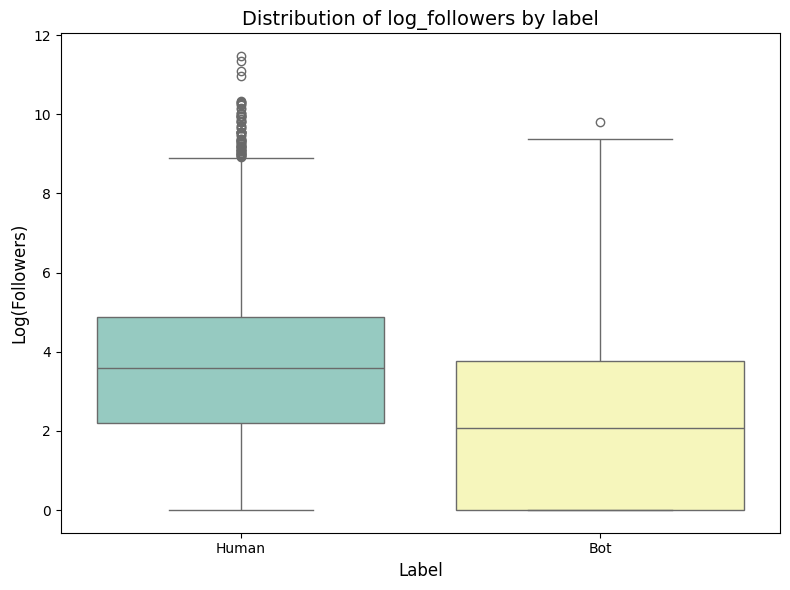

In [14]:
df = df[df['label'].isin(['Bot', 'Human'])]

# 绘制箱线图
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='log_followers', data=df, hue='label', palette='Set3', dodge=False, legend=False)
plt.title('Distribution of log_followers by label', fontsize=14)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Log(Followers)', fontsize=12)
plt.tight_layout()
plt.show()


绘制成对图：展示不同特征之间的成对关系，并根据label分类。

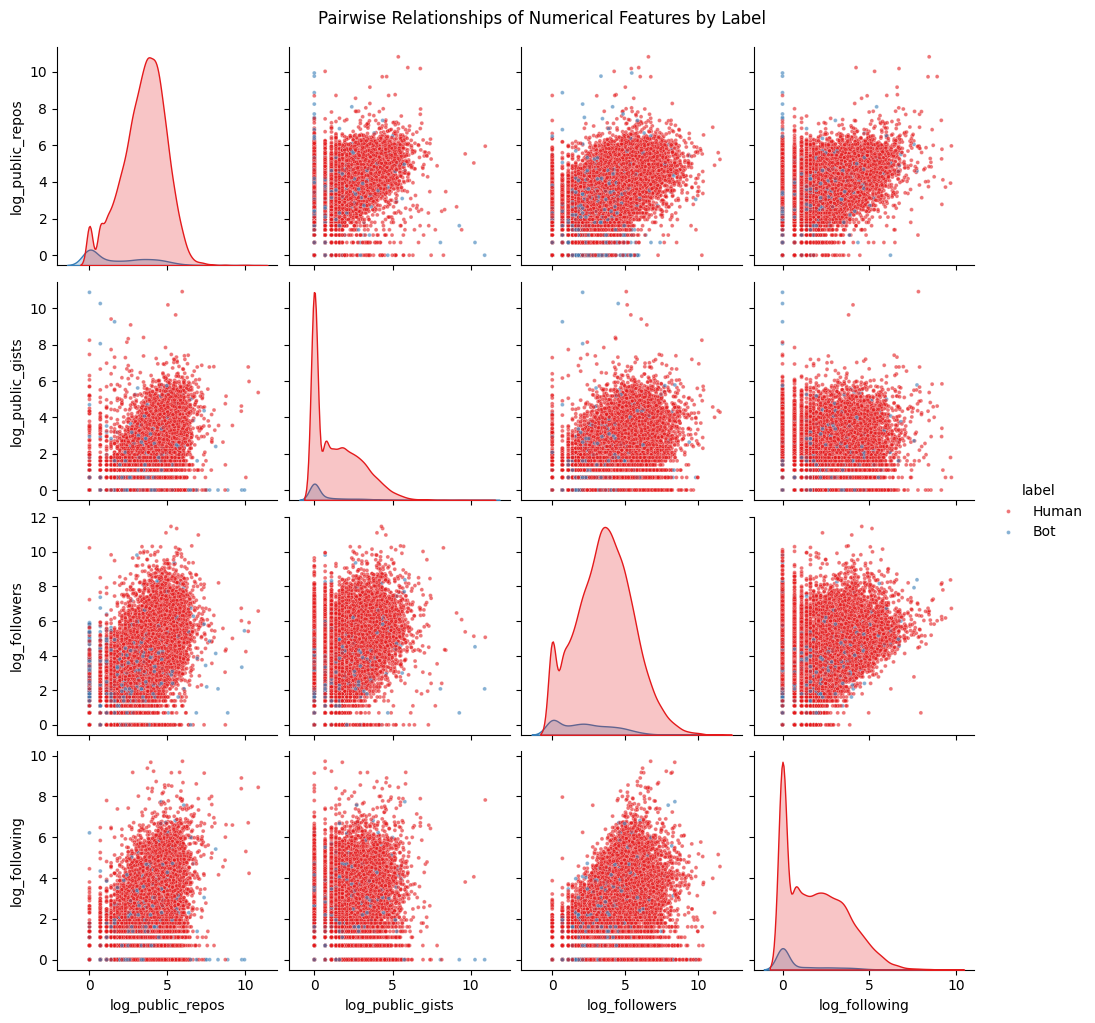

In [15]:
# 数值特征列
numerical_columns = ['log_public_repos', 'log_public_gists', 'log_followers', 'log_following']

# 绘制成对图
sns.pairplot(df[numerical_columns + ['label']], hue='label', palette='Set1', plot_kws={'alpha':0.6,'s':8})
plt.suptitle('Pairwise Relationships of Numerical Features by Label', y=1.02)
plt.show()


绘制热图：展示log_public_repos、log_public_gists、log_followers和log_following等特征之间的相关性。

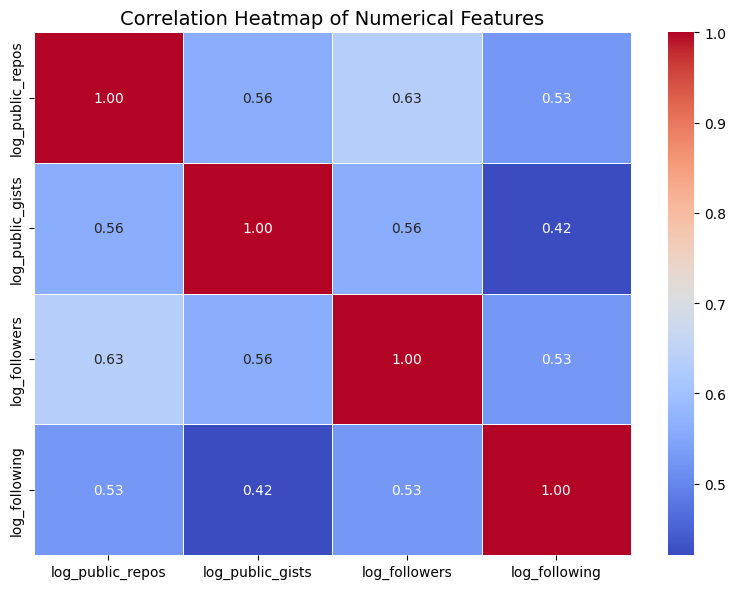

In [16]:
# 计算相关性矩阵
correlation_matrix = df[['log_public_repos', 'log_public_gists', 'log_followers', 'log_following']].corr()

# 绘制热图
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=14)
plt.tight_layout()
plt.show()


绘制小提琴图：展示label与log_followers之间的分布差异。

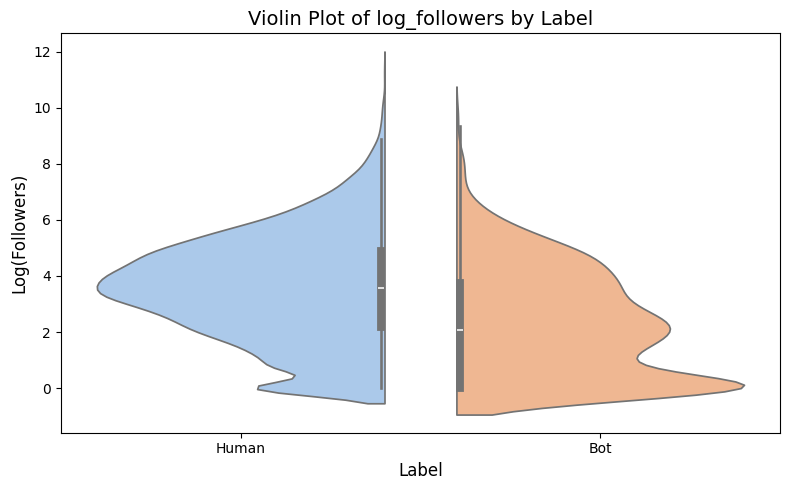

In [17]:
# 绘制小提琴图
plt.figure(figsize=(8, 5))
sns.violinplot(x='label', y='log_followers', data=df, hue='label', palette='pastel', split=True, dodge=False)
plt.title('Violin Plot of log_followers by Label', fontsize=14)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Log(Followers)', fontsize=12)
plt.tight_layout()
plt.show()


7.使用pandas_profiling.ProfileReport()生成交互式数据分析报告，分析数据的统计分布、缺失值、异常值等。

In [5]:
from ydata_profiling import ProfileReport  # 新库名称

# 生成数据分析报告
profile = ProfileReport(df, title="Data Analysis Report", explorative=True)

# 保存报告为HTML文件
profile.to_file("D:\\Data_code\\Courses\\ItDSaE\\HomeWork\\HW8_data_analysis_report.html")

# 在Jupyter Notebook中显示报告（可选）
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]